<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [ ]:
# !pip install yfinance
# !pip install bs4
# !pip install nbformat

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [6]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [7]:
# Enter the ticker symbol for Tesla
ticker_symbol = 'TSLA'

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [15]:
# Create a ticker object for Tesla
tesla_ticker = yf.Ticker(ticker_symbol)

# You can now use the tesla_ticker object to access data about Tesla
# For example, to get Tesla's info:
tesla_info = tesla_ticker.info


# Get historical data for Tesla
tesla_data = tesla_ticker.history(period="max") 

tesla_data


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-27 00:00:00-05:00,394.799988,406.690002,389.000000,397.149994,58125500,0.0,0.0
2025-01-28 00:00:00-05:00,396.910004,400.589996,386.500000,398.089996,48910700,0.0,0.0
2025-01-29 00:00:00-05:00,395.209991,398.589996,384.480011,389.100006,68033600,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [16]:
# Reset the index of the DataFrame
tesla_data.reset_index(inplace=True)

# Display the first five rows
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [17]:
# URL of the webpage
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

# Send a GET request to fetch the webpage
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the text of the response as a variable
    html_data = response.text
    print("Webpage downloaded successfully!")
else:
    print(f"Failed to download the webpage. Status code: {response.status_code}")
    

Webpage downloaded successfully!


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [22]:
# Parse the HTML data using BeautifulSoup and html5lib parser
soup = BeautifulSoup(html_data, 'html5lib')
    
# Alternatively, you can use the 'html.parser' parser
# soup = BeautifulSoup(html_data, 'html.parser')

# Print the parsed HTML (the pretty version)
print(soup.prettify())  # Optional: To print the formatted HTML data


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Tesla Revenue 2010-2022 | TSLA | MacroTrends
  </title>
  <meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla revenue for the quarter end

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [28]:
# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html5lib')
    
# Find the second <tbody> containing Tesla Quarterly Revenue table (based on your instructions)
table_body = soup.find_all("tbody")[1]
    
# Create an empty list to store rows of data
data = []
    
# Loop through the rows in the table body
for row in table_body.find_all("tr"):
    columns = row.find_all("td")
    if len(columns) > 1:  # Avoid empty rows
        # Extract the Date and Revenue
        date = columns[0].text.strip()
        revenue = columns[1].text.strip()
        # Append to the data list
        data.append([date, revenue])
    
# Convert the data to a pandas DataFrame
tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])
    
# Show the first 5 rows of the DataFrame
print(tesla_revenue.head())


         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [29]:
# Remove commas and dollar signs from the 'Revenue' column
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(r',|\$', "", regex=True)

# Convert the 'Revenue' column to numeric values
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"])

# Display the updated DataFrame
print(tesla_revenue)


          Date  Revenue
0   2022-09-30  21454.0
1   2022-06-30  16934.0
2   2022-03-31  18756.0
3   2021-12-31  17719.0
4   2021-09-30  13757.0
5   2021-06-30  11958.0
6   2021-03-31  10389.0
7   2020-12-31  10744.0
8   2020-09-30   8771.0
9   2020-06-30   6036.0
10  2020-03-31   5985.0
11  2019-12-31   7384.0
12  2019-09-30   6303.0
13  2019-06-30   6350.0
14  2019-03-31   4541.0
15  2018-12-31   7226.0
16  2018-09-30   6824.0
17  2018-06-30   4002.0
18  2018-03-31   3409.0
19  2017-12-31   3288.0
20  2017-09-30   2985.0
21  2017-06-30   2790.0
22  2017-03-31   2696.0
23  2016-12-31   2285.0
24  2016-09-30   2298.0
25  2016-06-30   1270.0
26  2016-03-31   1147.0
27  2015-12-31   1214.0
28  2015-09-30    937.0
29  2015-06-30    955.0
30  2015-03-31    940.0
31  2014-12-31    957.0
32  2014-09-30    852.0
33  2014-06-30    769.0
34  2014-03-31    621.0
35  2013-12-31    615.0
36  2013-09-30    431.0
37  2013-06-30    405.0
38  2013-03-31    562.0
39  2012-12-31    306.0
40  2012-09-30  

Execute the following lines to remove an null or empty strings in the Revenue column.


In [30]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [32]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31.0
49,2010-06-30,28.0
50,2010-03-31,21.0
52,2009-09-30,46.0
53,2009-06-30,27.0


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [39]:
# Create a ticker object for GameStop using the ticker symbol 'GME'
gme_ticker = yf.Ticker('GME')

# You can now access various data about GameStop (e.g., historical data, info, etc.)
# Example: Get GameStop's info
gme_info = gme_ticker.info

# Print the info to see the data
gme_info


{'address1': '625 Westport Parkway',
 'city': 'Grapevine',
 'state': 'TX',
 'zip': '76051',
 'country': 'United States',
 'phone': '817 424 2000',
 'website': 'https://www.gamestop.com',
 'industry': 'Specialty Retail',
 'industryKey': 'specialty-retail',
 'industryDisp': 'Specialty Retail',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'GameStop Corp., a specialty retailer, provides games and entertainment products through its stores and ecommerce platforms in the United States, Canada, Australia, and Europe. The company sells new and pre-owned gaming platforms; accessories, such as controllers, gaming headsets, and virtual reality products; new and pre-owned gaming software; and in-game digital currency, digital downloadable content, and full-game downloads. It sells collectibles comprising apparel, toys, trading cards, gadgets, and other retail products for pop culture and technology enthusiasts, as wel

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [38]:
# Extract stock data for the maximum period
gme_data = gme_ticker.history(period="max")

# Display the first few rows of the DataFrame
gme_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [41]:
# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
gme_data.head()


,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [44]:
import requests

# URL to the webpage
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

# Send a GET request to fetch the webpage
response = requests.get(url)

# Save the text of the response as a variable named html_data_2
html_data_2 = response.text

# Optionally, print the first 500 characters to verify
print(html_data_2[:500])


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [45]:
from bs4 import BeautifulSoup

# Parse the HTML data using BeautifulSoup and html.parser
soup = BeautifulSoup(html_data_2, 'html.parser')

# Optionally, print the parsed content or part of it to verify
print(soup.prettify()[:500])  # Print the first 500 characters of the prettified HTML


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface ge


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [68]:
# Extract the tables from the HTML (index 1 corresponds to the "GameStop Revenue" table)
tbody = pd.read_html(html_data_2)

# Extract the second table (index 1) which is GameStop Revenue
gme_revenue = tbody[1]
gme_revenue

# Inspect the columns to identify the correct column names
# print(gme_revenue.columns)

# # Clean the 'Revenue' column by removing commas and dollar signs
gme_revenue["GameStop Quarterly Revenue (Millions of US $).1"] = gme_revenue['GameStop Quarterly Revenue (Millions of US $).1'].str.replace(r',|\$', "", regex=True)

# Inspect the columns to identify the correct column names
gme_revenue

# # Display the cleaned DataFrame
print(gme_revenue.head())


  GameStop Quarterly Revenue (Millions of US $)  \
0                                    2020-04-30   
1                                    2020-01-31   
2                                    2019-10-31   
3                                    2019-07-31   
4                                    2019-04-30   

  GameStop Quarterly Revenue (Millions of US $).1  
0                                            1021  
1                                            2194  
2                                            1439  
3                                            1286  
4                                            1548  


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [69]:
gme_revenue.tail()

,GameStop Quarterly Revenue (Millions of US $),GameStop Quarterly Revenue (Millions of US $).1
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


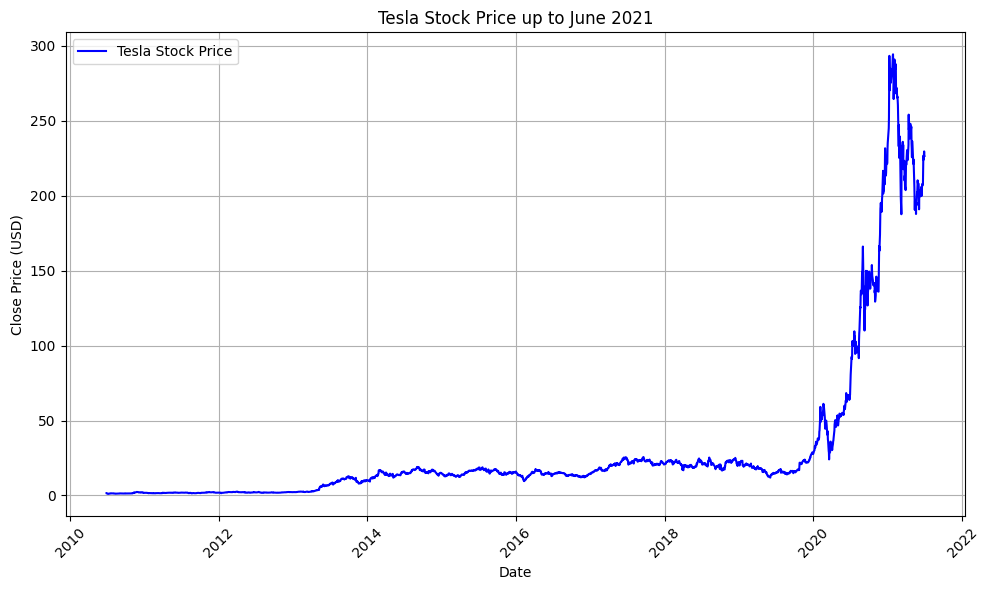

In [89]:
# Assuming tesla_data is the DataFrame containing Tesla stock data
# Filter the data up to June 2021 (you may need to format the Date column to datetime)
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_data = tesla_data[tesla_data['Date'] <= '2021-06-30']

# Call the function to make the graph for Tesla stock
make_graph(tesla_data, 'Tesla Stock Price up to June 2021')


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


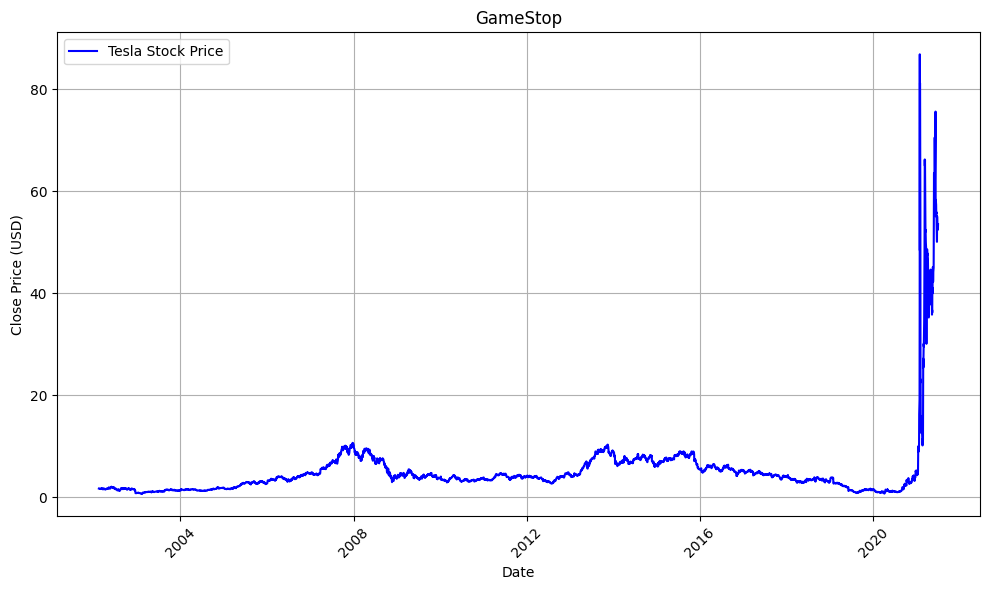

In [90]:
# Assuming gme_data is the DataFrame containing GameStop stock data
# Ensure the 'Date' column is in datetime format
gme_data['Date'] = pd.to_datetime(gme_data['Date'])

# Filter the data up to June 2021
gme_data_filtered = gme_data[gme_data['Date'] <= '2021-06-30']

# Call the make_graph function to plot the GameStop stock data
make_graph(gme_data_filtered,'GameStop')


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
